In [2]:
%matplotlib inline
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams.update({'font.size': 8})

columns = ['hour', 'last_windspd', 'last_no', 'last_no2', 'last_nox', 'last_o3', 'no', 'no2', 'nox', 'o3']

plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams.update({'font.size': 22})

df = pandas.read_csv('data00_100000_clean.csv')
df = df.drop(['AQS_Code', 'Latitude', 'Longitude', 'epoch', 'winddir', 'time', 'date', 'day'], axis=1)
df['last_windspd'] = df['windspd'].shift(1)
df['last_no'] = df['no'].shift(1)
df['last_no2'] = df['no2'].shift(1)
df['last_nox'] = df['nox'].shift(1)
df['last_o3'] = df['o3'].shift(1)
df = df.drop(df.index[[0]])




42208
--Key: windspd--
42208
--Key: o3--
42208
--Key: no--
42208
--Key: no2--
42208
--Key: nox--


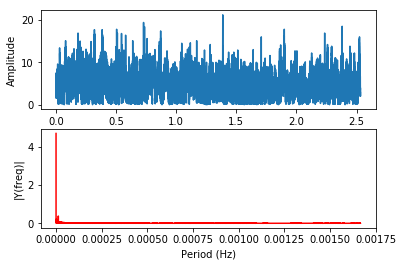

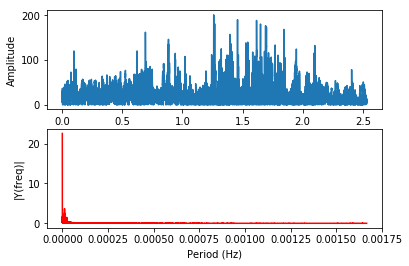

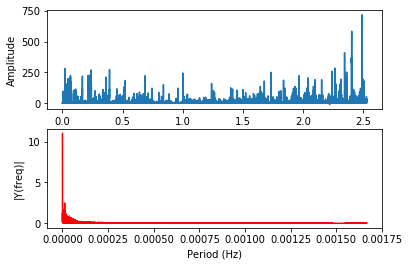

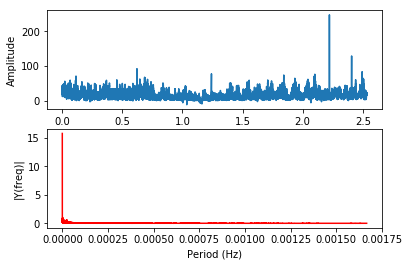

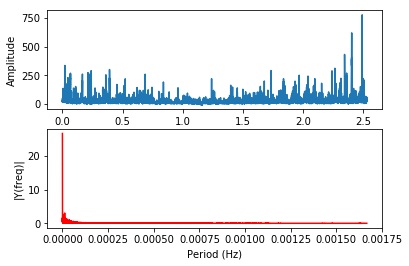

In [6]:
for key in ['windspd', 'o3', 'no', 'no2', 'nox']:
    y = df[key]


    Fs = 1/(60*5)  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    
    t = np.arange(0,60*5*len(y),Ts) # time vector

    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, ax = plt.subplots(2, 1)
    ax[0].plot(t,y)
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    ax[1].plot(frq, abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Period (Hz)')
    ax[1].set_ylabel('|Y(freq)|')

        
    print(len(frq))
    
    print("--Key: %s--" % key)
    for i in range(1, len(frq)):
        break
        period = 1/frq[i]
        if period > 6000.0:
            continue
            
        print("F(%d s) = %f" % (1/frq[i], abs(Y[i])))


array([    0,     1,     2, ..., 84414, 84415, 84416])